In [13]:
from AZOG.reactor import Reactor_Core
import numpy as np 
import matplotlib.pyplot as plt
from CoolProp.CoolProp import PropsSI
from tqdm import tqdm

In [14]:
reactor=Reactor_Core(TemperatureFuel=np.linspace(800,810,num=5)+273.16,TemperatureModerator=np.linspace(310,345,num=10)+273.16,Power=1000e6,Precursor=2000,Pressure=15e6,Temp_hotleg=350+273.16,Temp_coldleg=300+273.16,Temp_lowerplenum=305+273.16,Temp_upplerplenum=345+273.16)

In [15]:
reactor.total_delayed_const/(reactor.NGT*reactor.Lamda)


2720.09386535244

In [16]:
import xlsxwriter 
work_book=xlsxwriter.Workbook('test_case_reactor_a.excel')
data_sheet=work_book.add_worksheet("test")

row=0
data_sheet.write(row,0,'T')
data_sheet.write(row,1,'Tf1')
data_sheet.write(row,2,'Tf2')
data_sheet.write(row,3,'Tf3')
data_sheet.write(row,4,'Tf4')
data_sheet.write(row,5,'Tf5')

data_sheet.write(row,6,'Tmo1')
data_sheet.write(row,7,'Tmo2')
data_sheet.write(row,8,'Tmo3')
data_sheet.write(row,9,'Tmo4')
data_sheet.write(row,10,'Tmo5')
data_sheet.write(row,11,'Tmo6')
data_sheet.write(row,12,'Tmo7')
data_sheet.write(row,13,'Tmo8')
data_sheet.write(row,14,'Tmo9')
data_sheet.write(row,15,'Tmo10')
data_sheet.write(row,16,'Power')
data_sheet.write(row,17,'Thl')
data_sheet.write(row,18,'Tcl')
data_sheet.write(row,19,'Tlp')
data_sheet.write(row,20,'Tup')
data_sheet.write(row,21,'Precursor')
data_sheet.write(row,22,'Reactivity')

0

In [17]:
Simulation_time=500
dt=0.001

row=1
t=np.linspace(0,Simulation_time,num=int(Simulation_time/dt))

print("Simulation running... ... ..\n")
for i in tqdm(range(len(t))):


    PowerRatio=reactor.integrator(reactor.DPowerRatio,argsforfunction=[],intitial_cond=reactor.PowerRatio,time_step=dt)
    Precursor=reactor.integrator(reactor.DPrecoursor,argsforfunction=[],intitial_cond=reactor.Precursor,time_step=dt)
    #print(PowerRatio)

    Tf1=reactor.integrator(reactor.DTf1,argsforfunction=[],intitial_cond=reactor.Tf1,time_step=dt)
    Tf2=reactor.integrator(reactor.DTf2,argsforfunction=[],intitial_cond=reactor.Tf2,time_step=dt)
    Tf3=reactor.integrator(reactor.DTf3,argsforfunction=[],intitial_cond=reactor.Tf3,time_step=dt)
    Tf4=reactor.integrator(reactor.DTf4,argsforfunction=[],intitial_cond=reactor.Tf4,time_step=dt)
    Tf5=reactor.integrator(reactor.DTf5,argsforfunction=[],intitial_cond=reactor.Tf5,time_step=dt)

    Tmo1=reactor.integrator(reactor.DTmo1,argsforfunction=[],intitial_cond=reactor.Tmo1,time_step=dt)
    Tmo2=reactor.integrator(reactor.DTmo2,argsforfunction=[],intitial_cond=reactor.Tmo2,time_step=dt)
    Tmo3=reactor.integrator(reactor.DTmo3,argsforfunction=[],intitial_cond=reactor.Tmo3,time_step=dt)
    Tmo4=reactor.integrator(reactor.DTmo4,argsforfunction=[],intitial_cond=reactor.Tmo4,time_step=dt)
    Tmo5=reactor.integrator(reactor.DTmo5,argsforfunction=[],intitial_cond=reactor.Tmo5,time_step=dt)
    Tmo6=reactor.integrator(reactor.DTmo6,argsforfunction=[],intitial_cond=reactor.Tmo6,time_step=dt)
    Tmo7=reactor.integrator(reactor.DTmo7,argsforfunction=[],intitial_cond=reactor.Tmo7,time_step=dt)
    Tmo8=reactor.integrator(reactor.DTmo8,argsforfunction=[],intitial_cond=reactor.Tmo8,time_step=dt)
    Tmo9=reactor.integrator(reactor.DTmo9,argsforfunction=[],intitial_cond=reactor.Tmo9,time_step=dt)
    Tmo10=reactor.integrator(reactor.DTmo10,argsforfunction=[],intitial_cond=reactor.Tmo10,time_step=dt)

    Thl=reactor.integrator(reactor.DThl,argsforfunction=[],intitial_cond=reactor.Thl,time_step=dt)
    Tcl=reactor.integrator(reactor.DTcl,argsforfunction=[380],intitial_cond=reactor.Tcl,time_step=dt)
    Tlp=reactor.integrator(reactor.DTlp,argsforfunction=[],intitial_cond=reactor.Tlp,time_step=dt)
    Tup=reactor.integrator(reactor.DTup,argsforfunction=[],intitial_cond=reactor.Tup,time_step=dt)

    fuel_temp=Tf1+Tf2+Tf3+Tf4+Tf5
    mod_temp=Tmo1+Tmo2+Tmo3+Tmo4+Tmo5+Tmo6+Tmo7+Tmo8+Tmo9+Tmo10

    reactor.Reactivity(FuelTempSum=fuel_temp,ModeratorTempSum=mod_temp)

    reactor.PowerRatio=PowerRatio
    reactor.Precursor=Precursor
    reactor.Tf1=Tf1
    reactor.Tf2=Tf2
    reactor.Tf3=Tf3
    reactor.Tf4=Tf4
    reactor.Tf5=Tf5
    
    reactor.Tmo1=Tmo1
    reactor.Tmo2=Tmo2
    reactor.Tmo3=Tmo3
    reactor.Tmo4=Tmo4
    reactor.Tmo5=Tmo5
    reactor.Tmo6=Tmo6
    reactor.Tmo7=Tmo7
    reactor.Tmo8=Tmo8
    reactor.Tmo9=Tmo9
    reactor.Tmo10=Tmo10

    reactor.Thl=Thl
    reactor.Tup=Tup
    reactor.Tlp=Tcl
    reactor.Tcl=Tcl
    
    if (i%1000)==0:
        data_sheet.write(row,0,t[i])
        
        data_sheet.write(row,1,Tf1)
        data_sheet.write(row,2,Tf2)
        data_sheet.write(row,3,Tf3)
        data_sheet.write(row,4,Tf4)
        data_sheet.write(row,5,Tf5)

        data_sheet.write(row,6,Tmo1)
        data_sheet.write(row,7,Tmo2)
        data_sheet.write(row,8,Tmo3)
        data_sheet.write(row,9,Tmo4)
        data_sheet.write(row,10,Tmo5)
        data_sheet.write(row,11,Tmo6)
        data_sheet.write(row,12,Tmo7)
        data_sheet.write(row,13,Tmo8)
        data_sheet.write(row,14,Tmo9)
        data_sheet.write(row,15,Tmo10)
        data_sheet.write(row,16,reactor.PowerRatio)
        data_sheet.write(row,17,Thl)
        data_sheet.write(row,18,Tcl)
        data_sheet.write(row,19,Tlp)
        data_sheet.write(row,20,Tup)
        data_sheet.write(row,21,reactor.Precursor)
        data_sheet.write(row,22,reactor.reactivity)
        row=row+1

    
work_book.close()

Simulation running... ... ..



  0%|          | 737/500000 [00:00<10:14, 812.80it/s]

100%|██████████| 500000/500000 [04:03<00:00, 2052.47it/s]


In [18]:
path='/media/ebny_walid/New Volume/Thesis/thesis_final_code/test_case_reactor_a.excel'
from pandas import read_excel
data1=read_excel(path)
data1.head(-10)

,T,Tf1,Tf2,Tf3,Tf4,Tf5,Tmo1,Tmo2,Tmo3,Tmo4,...,Tmo8,Tmo9,Tmo10,Power,Thl,Tcl,Tlp,Tup,Precursor,Reactivity
0,0.000000,1073.256842,1075.758421,1078.260000,1080.761578,1083.263157,583.471543,587.385114,591.269637,595.158526,...,610.705349,614.589872,618.478761,0.943445,623.158308,573.094649,578.091468,618.160000,2000.056555,-6.474746e-07
1,1.000002,1093.385836,1105.692790,1116.658577,1126.399280,1135.027133,540.828048,563.935016,585.753715,607.496526,...,686.659873,704.574032,722.368399,0.708719,628.391723,517.661197,517.707788,666.111454,1997.235433,-2.316792e-04
2,2.000004,1092.559780,1113.613271,1133.063288,1150.999682,1167.512324,502.143252,526.122621,549.102720,572.046937,...,657.670796,677.556179,697.371219,0.696341,643.276074,478.141535,478.174750,687.664194,1990.515326,-3.265119e-04
3,3.000006,1081.857673,1109.731127,1135.954877,1160.587713,1183.691164,474.198067,498.426713,521.904384,545.368905,...,634.512364,655.599251,676.643738,0.692100,656.177557,449.967145,449.990824,686.519759,1982.693351,-3.409085e-04
4,4.000008,1067.434815,1100.454502,1131.910986,1161.833699,1190.256358,454.029519,478.185549,501.792071,525.397719,...,616.290888,638.089851,659.864164,0.692147,663.477999,429.881035,429.897917,676.463065,1975.084410,-3.144131e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,485.000970,990.151318,1035.045747,1079.940176,1124.834605,1169.729035,402.447215,424.894429,447.341644,469.788858,...,559.577717,582.024931,604.472146,0.722229,604.472146,380.000000,380.000000,604.472146,1964.531283,2.843365e-12
486,486.000972,990.151318,1035.045747,1079.940176,1124.834605,1169.729035,402.447215,424.894429,447.341644,469.788858,...,559.577717,582.024931,604.472146,0.722229,604.472146,380.000000,380.000000,604.472146,1964.531283,2.747510e-12
487,487.000974,990.151318,1035.045747,1079.940176,1124.834605,1169.729035,402.447215,424.894429,447.341644,469.788858,...,559.577717,582.024931,604.472146,0.722229,604.472146,380.000000,380.000000,604.472146,1964.531283,2.654957e-12
488,488.000976,990.151318,1035.045747,1079.940176,1124.834605,1169.729035,402.447215,424.894429,447.341644,469.788858,...,559.577717,582.024931,604.472146,0.722229,604.472146,380.000000,380.000000,604.472146,1964.531283,2.565489e-12


Text(0, 0.5, 'Transient Power Factor')

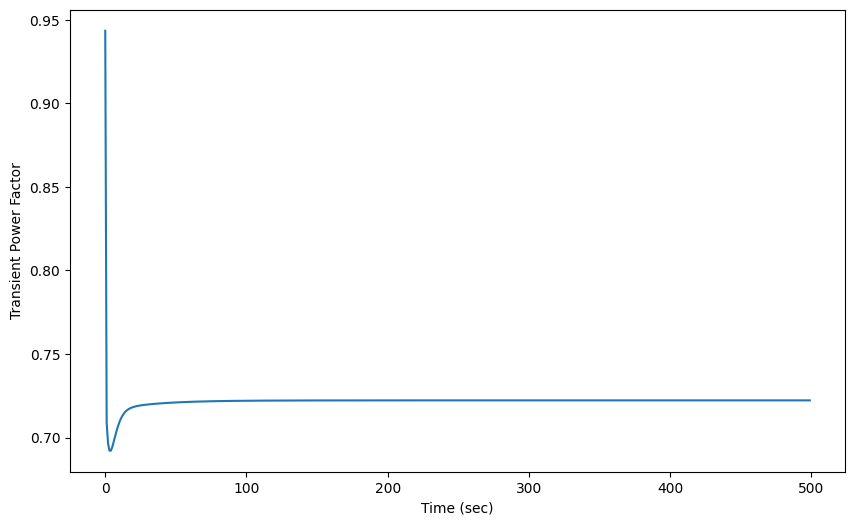

In [19]:

plt.figure(figsize=(10,6))
plt.plot(data1['T'],data1['Power'])

plt.xlabel("Time (sec)")
plt.ylabel('Transient Power Factor')

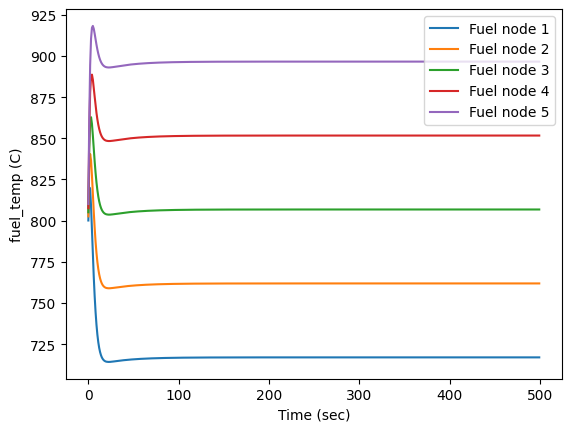

In [25]:

plt.plot(np.array(data1["T"]),np.array(data1["Tf1"])-273.16)
plt.plot(np.array(data1["T"]),np.array(data1["Tf2"])-273.16 )
plt.plot(np.array(data1["T"]),np.array(data1["Tf3"])-273.16 )
plt.plot(np.array(data1["T"]),np.array(data1["Tf4"])-273.16 )
plt.plot(np.array(data1["T"]),np.array(data1["Tf5"])-273.16 )


plt.legend(['Fuel node 1','Fuel node 2','Fuel node 3','Fuel node 4','Fuel node 5','Fuel node 1','Fuel node 2','Fuel node 3','Fuel node 4','Fuel node 5'])
plt.xlabel('Time (sec)')
plt.ylabel("fuel_temp (C)")

TEMP=(np.array(data1["Tf1"])+np.array(data1["Tf2"])+np.array(data1["Tf3"])+np.array(data1["Tf4"])+np.array(data1["Tf5"]))

In [21]:
np.average(np.array(data1["Tf1"])+np.array(data1["Tf2"])+np.array(data1["Tf3"])+np.array(data1["Tf4"])+np.array(data1["Tf5"]))


1080.420408681405

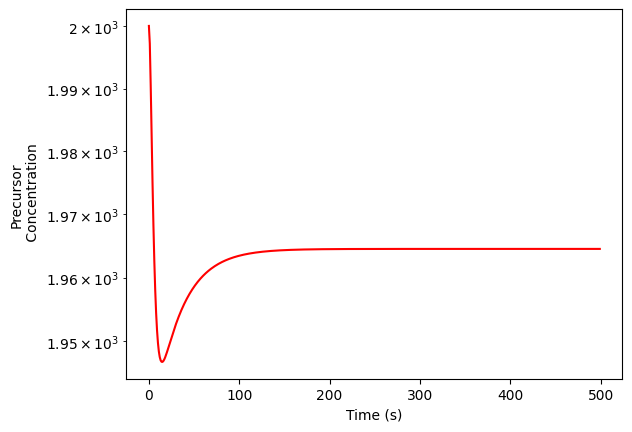

In [43]:
plt.plot(data1['T'],data1['Precursor'],color='red')
plt.ylabel("Precursor\n Concentration")
plt.xlabel("Time (s)")
plt.yscale('log')

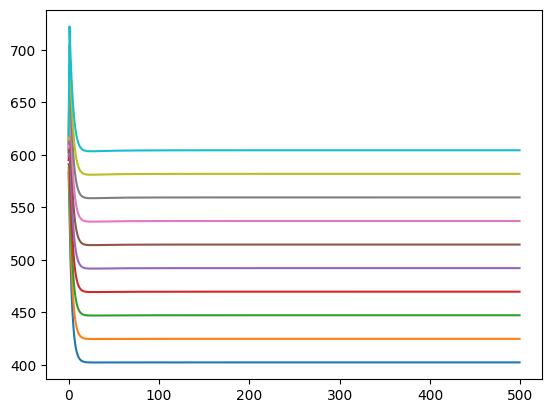

In [23]:


plt.plot(data1['T'],data1['Tmo1'])
plt.plot(data1['T'],data1['Tmo2'])
plt.plot(data1['T'],data1['Tmo3'])
plt.plot(data1['T'],data1['Tmo4'])
plt.plot(data1['T'],data1['Tmo5'])
plt.plot(data1['T'],data1['Tmo6'])
plt.plot(data1['T'],data1['Tmo7'])
plt.plot(data1['T'],data1['Tmo8'])
plt.plot(data1['T'],data1['Tmo9'])
plt.plot(data1['T'],data1['Tmo10'])

Text(0, 0.5, 'Reactivity, $\\rho$')

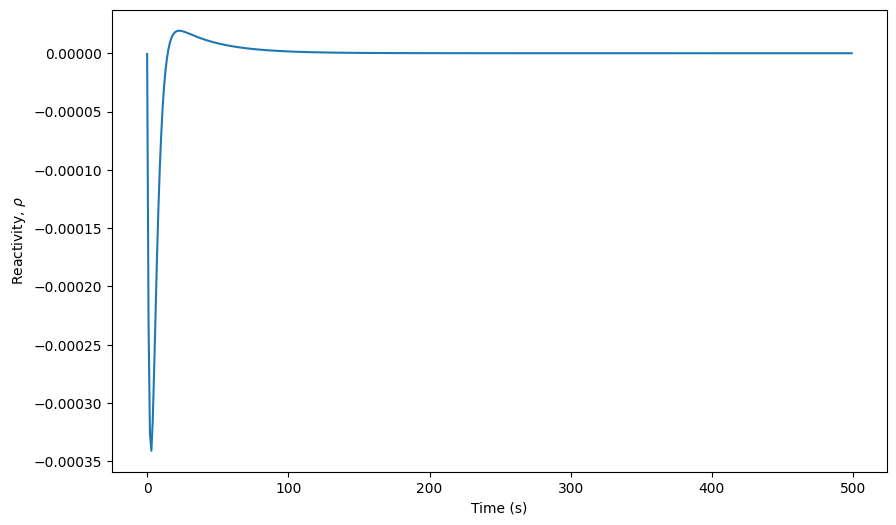

In [58]:
plt.figure(figsize=(10,6))
plt.plot(data1['T'],data1['Reactivity'])
plt.xlabel("Time (s)")
plt.ylabel(r"Reactivity, $\rho$")

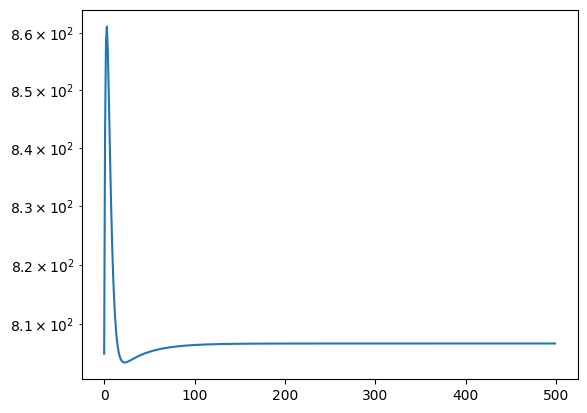

In [59]:
plt.plot (TEMP/5-273.16)
plt.yscale('log')